# Análise de Vendas com Python

## 1. Importação dos Dados de uma Planilha Excel

Utilizaremos no projeto um dataset fictício que simula vendas de uma loja virtual, contendo informações como data da venda, 
produto, quantidade, preço unitário, cliente e categoria do produto.

Arquivo: **dados_vendas_ficticios.xlsx**

In [1]:
# Importar as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ler a Planilha de Vendas

arquivo = "dados_vendas.xlsx"

try:
    dados = pd.read_excel(arquivo, engine="openpyxl")
    print(f"Arquivo carregado: {arquivo}.")
except FileNotFoundError as err:
    print(f"Erro: O arquivo '{arquivo}' não foi encontrado.")
    exit(0)

Arquivo carregado: dados_vendas.xlsx.


In [3]:
# Imprimir o Dataframe:

dados.head(10)

,Data,Produto,Quantidade,Preco_Unitario,Cliente,Valor_Total,Categoria
0,2023-06-07,Óculos de Sol,3,112.90,Cliente_79,338.70,Acessórios
1,2023-03-06,Boné,2,105.83,Cliente_47,211.66,Acessórios
2,2023-06-26,Jaqueta,3,56.39,Cliente_56,169.17,Roupas
3,2023-01-28,Óculos de Sol,3,144.13,Cliente_86,432.39,Acessórios
4,2023-02-08,Tênis Esportivo,3,115.93,Cliente_14,347.79,Calçados
5,2023-05-10,Jaqueta,4,92.07,Cliente_90,368.28,Roupas
6,2023-04-08,Jaqueta,4,99.52,Cliente_28,398.08,Roupas
7,2023-03-24,Óculos de Sol,3,74.55,Cliente_87,223.65,Acessórios
8,2023-04-08,Calça Jeans,4,52.21,Cliente_78,208.84,Roupas
9,2023-01-29,Tênis Esportivo,1,66.28,Cliente_88,66.28,Calçados


## 2. Limpeza dos Dados

Nesta etapa, realizamos a limpeza dos dados para garantir a qualidade da análise.

- Remoção de duplicatas
- Tratamento de valores nulos
- Conversão de tipos de dados (datas e numéricos)

In [4]:
# Remover duplicatas
dados = dados.drop_duplicates()

# Verificar valores nulos
print(dados.isnull().sum())

# Converter coluna Data para datetime (se necessário)
dados['Data'] = pd.to_datetime(dados['Data'])

# Conferir tipos de dados
dados.dtypes

Data              0
Produto           0
Quantidade        0
Preco_Unitario    0
Cliente           0
Valor_Total       0
Categoria         0
dtype: int64


Data              datetime64[ns]
Produto                   object
Quantidade                 int64
Preco_Unitario           float64
Cliente                   object
Valor_Total              float64
Categoria                 object
dtype: object

In [5]:
# Imprimir o Dataframe após limpeza

dados.head()

,Data,Produto,Quantidade,Preco_Unitario,Cliente,Valor_Total,Categoria
0,2023-06-07,Óculos de Sol,3,112.90,Cliente_79,338.70,Acessórios
1,2023-03-06,Boné,2,105.83,Cliente_47,211.66,Acessórios
2,2023-06-26,Jaqueta,3,56.39,Cliente_56,169.17,Roupas
3,2023-01-28,Óculos de Sol,3,144.13,Cliente_86,432.39,Acessórios
4,2023-02-08,Tênis Esportivo,3,115.93,Cliente_14,347.79,Calçados


## 3. Análise Exploratória dos Dados

#### Aqui exploramos os dados para extrair informações relevantes.

- Produtos mais vendidos
- Vendas por dia da semana
- Ticket médio por cliente
- Visualizações gráficas com Matplotlib e Seaborn

**3.1 Quais os produtos mais vendidos?**

In [6]:
# Produtos mais vendidos: Soma a quantidade vendida por produto e ordena do mais vendido para o menos vendido.

produtos_vendidos = dados.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)
print(produtos_vendidos)

Produto
Camisa Polo        124
Boné               117
Tênis Esportivo    114
Óculos de Sol      111
Relógio            109
Calça Jeans        103
Jaqueta             97
Name: Quantidade, dtype: int64


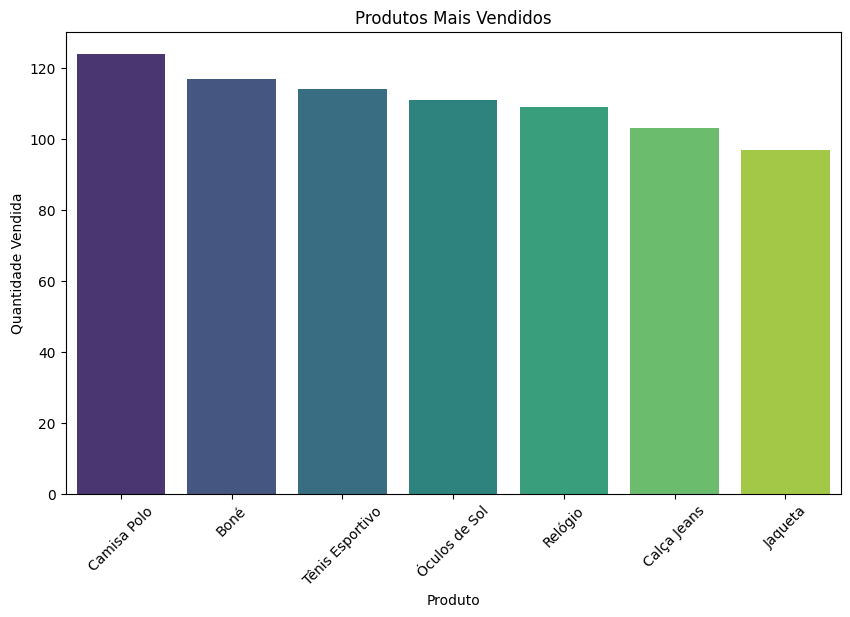

In [7]:
# Gráfico de barras - Produtos mais vendidos

plt.figure(figsize=(10,6))
sns.barplot(x=produtos_vendidos.index, y=produtos_vendidos.values, palette='viridis')
plt.title('Produtos Mais Vendidos')
plt.ylabel('Quantidade Vendida')
plt.xlabel('Produto')
plt.xticks(rotation=45)
plt.show()


**3.2 Qual o dia da semana com maior vendas?**


In [8]:
import locale

# Configura a localidade para português (pode variar conforme o sistema)
try:
    locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')
except locale.Error:
    print("Aviso: Locale pt_BR.UTF-8 não disponível no sistema. Usando padrão.")

# Converte para datetime
dados['Data'] = pd.to_datetime(dados['Data'], errors='coerce')

# Cria coluna com o nome do dia da semana
dados['Dia_Semana'] = dados['Data'].dt.day_name(locale='pt_BR')

# Soma o valor total de vendas por dia da semana e força a exibição na ordem cronológica (segunda → domingo), 
# incluindo dias sem vendas como zero ou NaN.
vendas_dia_semana = dados.groupby('Dia_Semana')['Valor_Total'].sum().reindex([
    'Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo'])
print(vendas_dia_semana)

Dia_Semana
Segunda-feira    10838.92
Terça-feira       7472.84
Quarta-feira     10932.31
Quinta-feira      7928.71
Sexta-feira       9310.36
Sábado            8515.20
Domingo           9727.47
Name: Valor_Total, dtype: float64


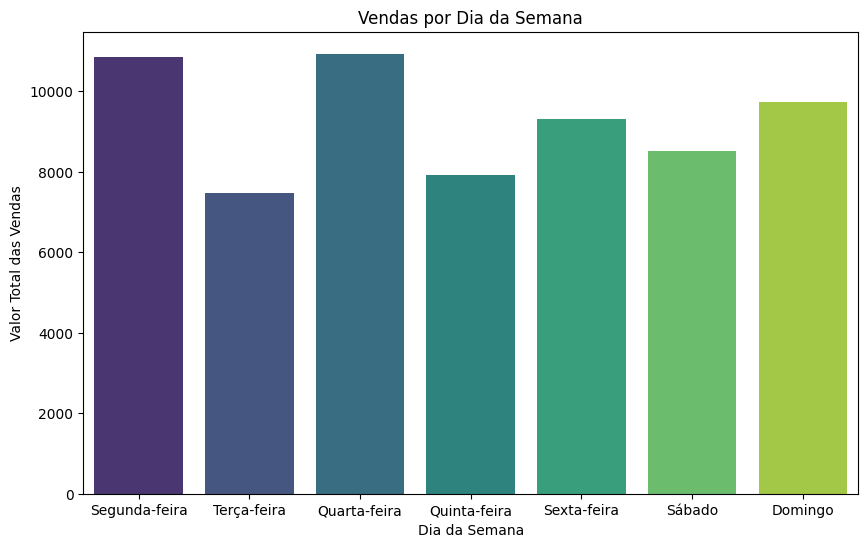

In [9]:
# Gráfico de barras - Vendas por dia da semana
plt.figure(figsize=(10,6))
#vendas_dia_semana.plot(kind='line', marker='o
sns.barplot(x=vendas_dia_semana.index, y=vendas_dia_semana.values, palette='viridis')
                       
plt.title('Vendas por Dia da Semana')
plt.ylabel('Valor Total das Vendas')
plt.xlabel('Dia da Semana')
#plt.grid(True)
plt.show()


**3.3 Qual o valor total gasto por cliente?**


In [10]:
# Ticket médio por cliente
# Calcula o valor médio gasto por cliente e lista os clientes que mais gastam em média, 
# do maior para o menor.

# Ticket médio = Valor total gasto por cliente ÷ Número de compras

# É um indicador importante para:
# Identificar clientes de alto valor
# Segmentar campanhas de marketing
# Avaliar fidelidade

ticket_medio = dados.groupby('Cliente')['Valor_Total'].mean().sort_values(ascending=False)
print(ticket_medio)

Cliente
Cliente_34    417.680
Cliente_57    404.170
Cliente_44    396.600
Cliente_55    396.035
Cliente_1     363.060
               ...   
Cliente_82     87.280
Cliente_73     85.920
Cliente_77     61.160
Cliente_88     56.880
Cliente_92     46.570
Name: Valor_Total, Length: 91, dtype: float64



**3.4 Qual a participação de cada produto no faturamento?**
    **Qual o produto com maior volume de vendas?**


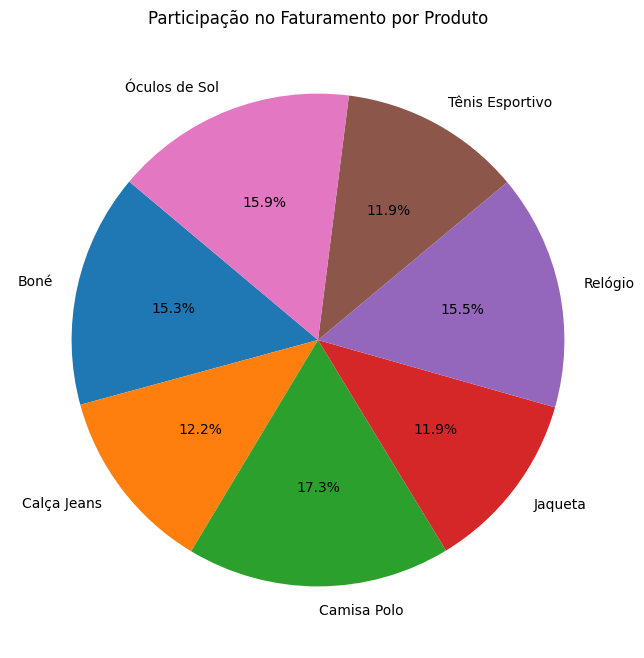

In [11]:
# Gráfico de pizza - Participação dos produtos no faturamento

faturamento_produtos = dados.groupby('Produto')['Valor_Total'].sum()
plt.figure(figsize=(8,8))
plt.pie(faturamento_produtos, labels=faturamento_produtos.index, autopct='%1.1f%%', startangle=140)
plt.title('Participação no Faturamento por Produto')
plt.show()


**3.5 Identificando clientes recorrentes**


In [12]:
# Identificando clientes recorrentes
clientes_frequentes = dados['Cliente'].value_counts()
clientes_recorrentes = clientes_frequentes[clientes_frequentes > 1].index

# Comparando gasto médio entre clientes recorrentes e novos
dados['Tipo_Cliente'] = dados['Cliente'].apply(lambda x: 'Recorrente' if x in clientes_recorrentes else 'Novo')

gasto_medio_tipo = dados.groupby('Tipo_Cliente')['Valor_Total'].mean()
print(gasto_medio_tipo)

# Exportar dados limpos para Excel
dados.to_excel('dados_vendas_limpos.xlsx', index=False)

# Exportar relatório em PDF (exemplo simples com matplotlib)
# Aqui você pode usar bibliotecas como ReportLab ou matplotlib.backends.backend_pdf para relatórios mais elaborados

# Salvar notebook com código comentado para entrega final

Tipo_Cliente
Novo          167.835833
Recorrente    217.749236
Name: Valor_Total, dtype: float64


## 4. Principais Insights e Entrega Final

#### Após a análise, destacamos os principais insights e entregamos os resultados.

- A "Camisa Polo" é o produto mais vendido, seguido pelo "Boné".
- Quarta-feira é o dia com maior volume de vendas.
- O cliente_34 é o cliente de alto valor.
- "Camisa Polo" representa uma fatia significativa do faturamento.
- Clientes recorrentes gastam mais que novos clientes.